<a href="https://colab.research.google.com/github/Scjatto/PyCollab/blob/main/TensorflowTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
print(tf.__version__)


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2.13.0


# Tenssorflow 2

## Constant Addition

* You can add constant nodes in a session
* You can add constant nodes without having a session

In [3]:

# create tensorflow session object
with tf.compat.v1.Session() as sess:
    # creating nodes in computation graph
    node1 = tf.constant(3, dtype=tf.int32)
    node2 = tf.constant(5, dtype=tf.int32)
    node3 = tf.add(node1, node2)
    # Use entire tf apis else use mathematical apis
    # node3 = node1 + node2
    # evaluating node3 and printing the result
    print("sum of node1 and node2 is : {} with sess_str: {}".format(sess.run(node3), sess.sess_str))



''' Without creating session object '''

node_non_sess1 = tf.constant(3, dtype=tf.int32)
node_non_sess2 = tf.constant(5, dtype=tf.int32)
node_non_sess3 = tf.add(node_non_sess1, node_non_sess2)


tf.print ("Sum of non session nodes 1 and 2 is: {}".format(node_non_sess3))

sum of node1 and node2 is : 8 with sess_str: b''
Sum of non session nodes 1 and 2 is: 8


## Variables

* Direct addition without session

In [5]:
global_node = tf.Variable(tf.zeros([2,2]))
global_node = tf.add (global_node, tf.ones([2,2]))
global_node = tf.add (global_node, tf.constant([[0.1,0.2],[0.3,0.4]], dtype=tf.float32))
tf.print (global_node)

[[1.1 1.2]
 [1.3 1.4]]


# Placeholders

* Direct addition without session

In [16]:
a = tf.Variable(tf.ones(shape=(2,2)))
b = tf.Variable(tf.zeros(shape=(2,2)))

# tf.print(a)
# tf.print(b)
tf.print (tf.add(a,b))

[[1 1]
 [1 1]]


# Fashion MNIST train and Test (Tensorflow Keras Deep Dive)

## Loading Fashin MNIST Data Set

In [17]:
"""The Fashion MNIST data is available directly in the tf.keras
 datasets API. You load it like this:"""

mnist = tf.keras.datasets.fashion_mnist

## Keras DataSet Objects Properties
* load_data() on keras dataset object return tuple of tuples of train data and test data
* (  (train_feature, train_label) , (test_feature, test_labels)  )
* Train data needed to create model
* Test data needed to validate created model to get the accuracy

In [18]:
"""Calling load_data on this object will give you two sets of two
 lists, these will be the training and testing values for the graphics
 that contain the clothing items and their labels."""

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [34]:
training_images.shape, training_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Visualization of MNIST dataset

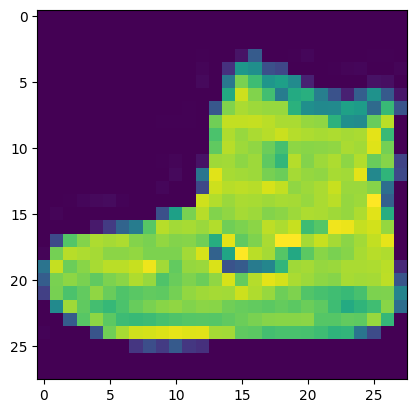

In [30]:
plt.figure()
plt.imshow(training_images[0])



### Class Names

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Showing some of the images from fashion mnist

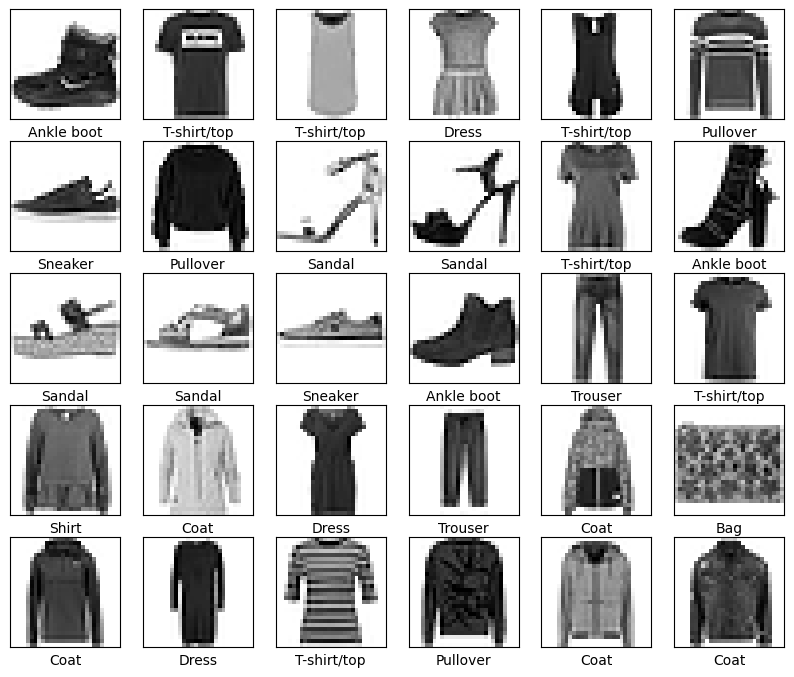

In [40]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

### Image Expalination
* Pixel values between 0 - 255
* Normalize the data between 0 - 1
* Divide the values with 255 to bring it to the range in 0 - 1

In [42]:
# Investigate one image
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

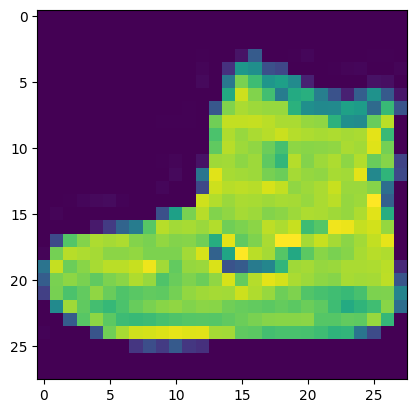

In [47]:
first_image_normalized = training_images[0] / 255
print (first_image_normalized)
plt.figure()
plt.imshow(first_image_normalized)

### Normalize all the training and testing data

In [48]:
train_normal_img = training_images / 255
test_normal_img = test_images / 255

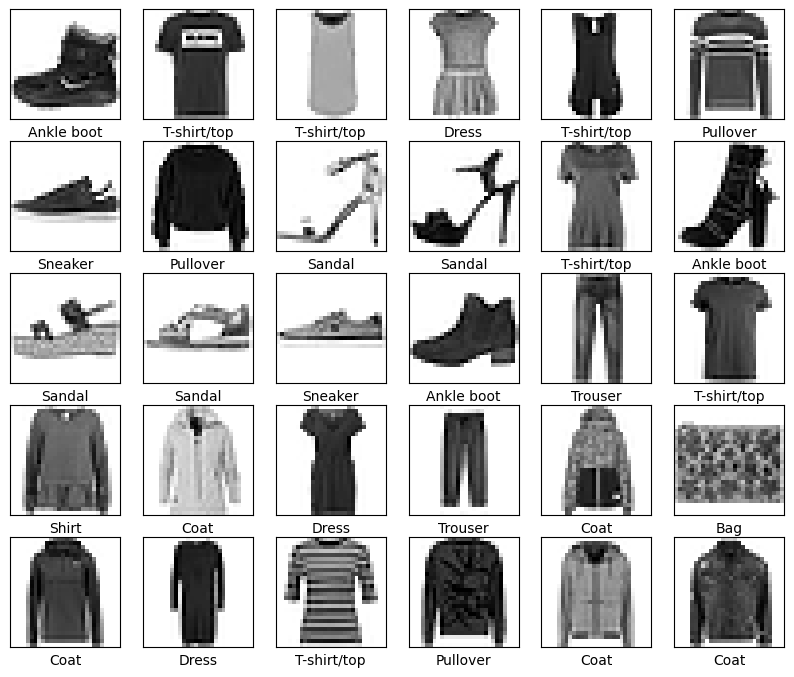

In [49]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_normal_img[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])
plt.show()

# Building the model on the normalized data

## Creation of the layers for the Neural Network

* The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).
* Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
* After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers.
* The first Dense layer has 128 nodes (or neurons).
* The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:

* Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
* The model learns to associate images and labels.
* You ask the model to make predictions about a test set—in this example, the test_images array.
* Verify that the predictions match the labels from the test_labels array.

In [54]:
model.fit(train_normal_img, training_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4923 - accuracy: 0.8279
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3753 - accuracy: 0.8626
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3348 - accuracy: 0.8775
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3126 - accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2965 - accuracy: 0.8913
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2823 - accuracy: 0.8956
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2694 - accuracy: 0.9007
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2583 - accuracy: 0.9027
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9064
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.240

# Evaluate the model against Test Data

* To be eavluates against normalised test data since the train data included was the normalized factor
* We will also check the prediction of test data without normalization

In [55]:
test_loss, test_acc = model.evaluate(test_normal_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3446 - accuracy: 0.8896 - 633ms/epoch - 2ms/step

Test accuracy: 0.8895999789237976


The above case is a simple demonstration of Overfitting

Lets also check the accuracy on non normalized data

In [56]:
test_loss_non_norm, test_acc_non_norm = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_non_norm)

313/313 - 1s - loss: 65.5495 - accuracy: 0.8740 - 593ms/epoch - 2ms/step

Test accuracy: 0.8740000128746033


Very high loss, representing the inconsistency of the data that it was trained with, and test data which is being tested



# Making Predictions with the above model

In [57]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [128]:
predictions = probability_model.predict(test_normal_img)
print (predictions, predictions.shape)

313/313 [==============================] - 1s 3ms/step
[[9.41554452e-13 1.64640822e-15 1.23534827e-08 ... 2.19890164e-04
  2.13592893e-11 9.98661876e-01]
 [1.08701715e-04 2.24601250e-18 9.99324620e-01 ... 7.18957653e-24
  5.87722308e-13 1.08402585e-20]
 [9.10440907e-12 9.99999940e-01 3.23322792e-11 ... 1.55202279e-24
  2.22011954e-16 1.83459107e-25]
 ...
 [1.01018305e-08 1.02304131e-14 8.09018130e-10 ... 2.28391722e-10
  9.99986589e-01 3.68994657e-16]
 [1.62465454e-08 9.99999106e-01 5.56113877e-10 ... 7.67808500e-17
  1.67329234e-10 1.38035538e-15]
 [3.42462681e-06 4.67331252e-14 5.58282665e-08 ... 6.40767248e-05
  9.45156387e-07 3.91548582e-07]] (10000, 10)


A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

argmax allows you to view the confidence of the given prediction, max probable label being followed by the prediction

# Determine predictions Textually

In [74]:
print("Prediction array: {} | Number of predictions : {}".format(predictions[0], len(predictions)))

print("Showing textual predictions for first 30 Predictions")

for i in range(30) :
    pred_conf = np.argmax(predictions[i])
    print ("Test Index: [{}] Predicted {} -> {}, Actual {} -> {}".format (i, pred_conf, class_names[pred_conf], test_labels[i], class_names[test_labels[i]]), end=" | ")

    if (pred_conf != test_labels[i]):
        print ("Incorrect Prediction")
    else:
        print ("Correct prediction")


print ("\n\n----------\n\nPrediction stats for overall predictions: ")

num_samples = len(predictions)
correct_prediction = 0
incorrect_prediction = 0
for i in range(num_samples) :
    pred_conf = np.argmax(predictions[i])
    # print ("Predicted {} -> {}, Actual {} -> {}".format (pred_conf, class_names[pred_conf], test_labels[i], class_names[test_labels[i]]), end=" | ")

    if (pred_conf != test_labels[i]):
        # print ("Incorrect Prediction")
        incorrect_prediction += 1;
    else:
        # print ("Correct prediction")
        correct_prediction += 1

print ("Percentage correct: {} %".format((correct_prediction/num_samples)* 100))
print ("Percentage incorrect: {} %".format((incorrect_prediction/num_samples)* 100))

Prediction array: [9.4155445e-13 1.6464082e-15 1.2353483e-08 7.7715811e-12 5.8592110e-11
 1.1182460e-03 2.1621562e-09 2.1989016e-04 2.1359289e-11 9.9866188e-01] | Number of predictions : 10000
Showing textual predictions for first 30 Predictions
Test Index: [0] Predicted 9 -> Ankle boot, Actual 9 -> Ankle boot | Correct prediction
Test Index: [1] Predicted 2 -> Pullover, Actual 2 -> Pullover | Correct prediction
Test Index: [2] Predicted 1 -> Trouser, Actual 1 -> Trouser | Correct prediction
Test Index: [3] Predicted 1 -> Trouser, Actual 1 -> Trouser | Correct prediction
Test Index: [4] Predicted 6 -> Shirt, Actual 6 -> Shirt | Correct prediction
Test Index: [5] Predicted 1 -> Trouser, Actual 1 -> Trouser | Correct prediction
Test Index: [6] Predicted 4 -> Coat, Actual 4 -> Coat | Correct prediction
Test Index: [7] Predicted 6 -> Shirt, Actual 6 -> Shirt | Correct prediction
Test Index: [8] Predicted 5 -> Sandal, Actual 5 -> Sandal | Correct prediction
Test Index: [9] Predicted 7 -> Sn

# View Predictions (Pictorial)

* Create Quick helper functions to view the input data

In [106]:
def plot_image(i, predictions_array, true_label_arr, img):
  true_label, img = true_label_arr[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred: {}| {:2.0f}% |Act: {}".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

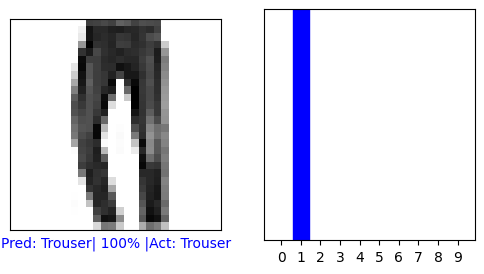

In [122]:
# One of the correct prediction
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_normal_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

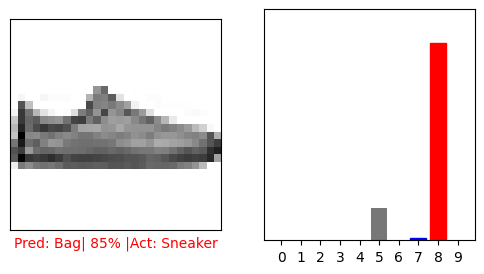

In [116]:
# One of the incorrect prediction

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_normal_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

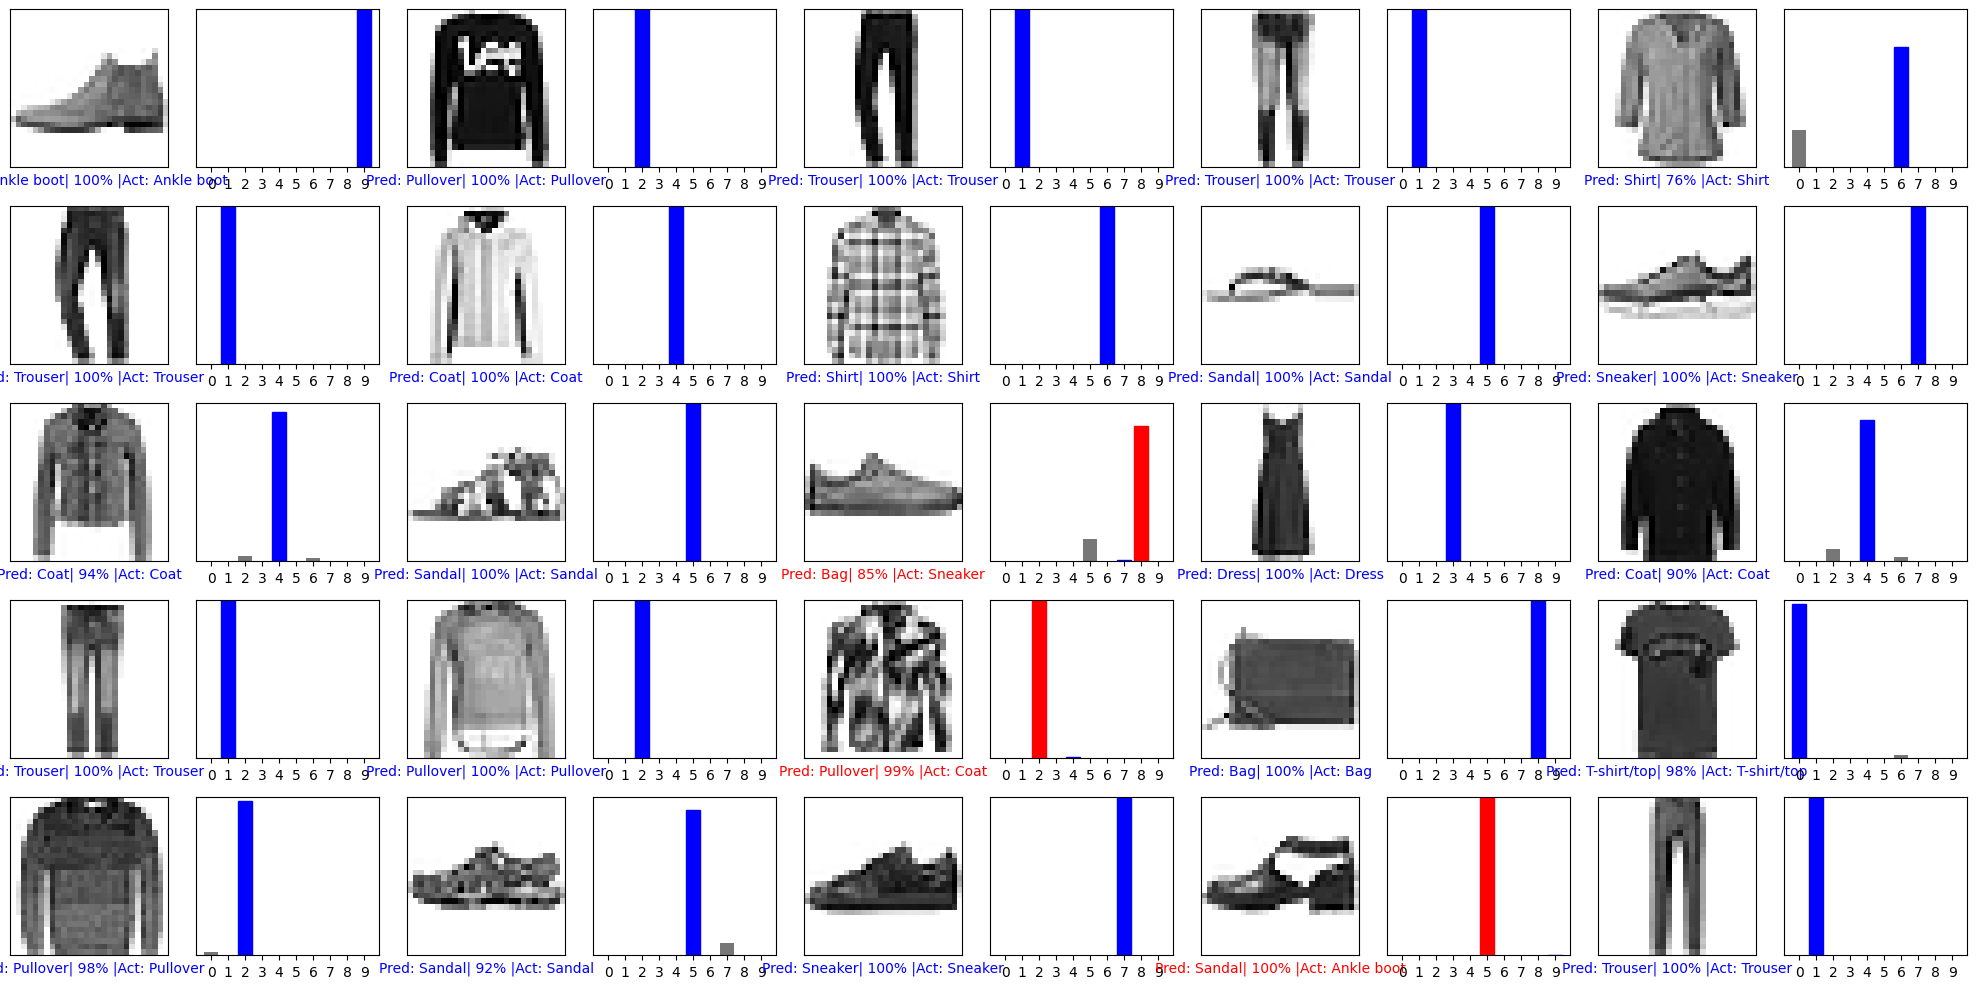

In [109]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_normal_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Predict Single Image
* Change dimention of single image to a batch dimention for model to predict
* Since predict() will need a batch dimention
* Check for the predictions using the above helper functions

In [117]:
single_img_idx = 1
single_img = test_normal_img[single_img_idx]
print(single_img.shape)

# Change image shape to nbatch shape with 1 image in the batch
img = (np.expand_dims(single_img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [129]:
# Predict Single Image
predictions_single = probability_model.predict(img)
print(predictions_single) # Array of Arrays with only one value in them
print (predictions_single, predictions_single.shape)

1/1 [==============================] - 0s 58ms/step
[[1.0870141e-04 2.2459782e-18 9.9932468e-01 1.5873981e-16 5.4746616e-04
  5.4729296e-14 1.9129533e-05 7.1895489e-24 5.8772242e-13 1.0840175e-20]]
[[1.0870141e-04 2.2459782e-18 9.9932468e-01 1.5873981e-16 5.4746616e-04
  5.4729296e-14 1.9129533e-05 7.1895489e-24 5.8772242e-13 1.0840175e-20]] (1, 10)


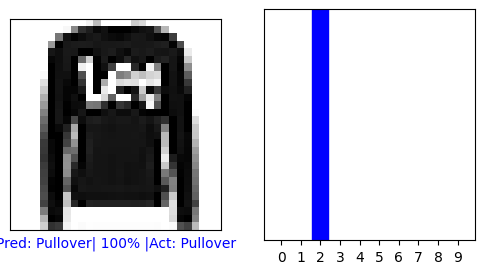

In [125]:
# Plot the predicted Image
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(single_img_idx, predictions_single, test_labels, test_normal_img)
plt.subplot(1,2,2)
plot_value_array(single_img_idx, predictions_single[0], test_labels)
plt.show()
